### demographics_static_clean.csv: combine races into three groups: white, black or american, and other
### inpatient_eth: original features + AgeBand + AgeBin
### inpatient_eth2: inpatient_eth features + all demographic features be encoded as labels (ie. 0,1,2..)
### inpatient_eth3: inpatient_eth2 features + all demographic features be encoded as one-hot 

In [3]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

In [6]:
path = '/home/bhatti/dataset/VCHAMPS/demographics_static_train.csv'
demographics_static_train = pd.read_csv(path).iloc[:,1:]
demographics_static_train.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168674,Hispanic or Latino,Male,White,Yes
1,168681,Not Hispanic or Latino,Male,White,Yes
2,168696,Not Hispanic or Latino,Female,Not specified (no value),Yes
3,168711,Not Hispanic or Latino,Male,Other,Yes
4,168720,Not Hispanic or Latino,Male,White,Yes


In [5]:
def races_combine(data):
    for i in range(len(data['Races'])):
        if  data['Races'].loc[i] == 'White ; Other':
            data['Races'].loc[i] = 'White'
        elif data['Races'].loc[i] == 'Black or African American ; Other':
            data['Races'].loc[i] = 'Black or African American'
        elif data['Races'].loc[i] == 'Black or African American ; White ; Asian':
            data['Races'].loc[i] = 'Black or African American'
        elif data['Races'].loc[i] == 'Black or African American ; White':
            data['Races'].loc[i] = 'White'
        elif data['Races'].loc[i] == 'Asian ; Other':
            data['Races'].loc[i] = 'Other'
        elif data['Races'].loc[i] == 'White ; Asian':
            data['Races'].loc[i] = 'White'
        elif data['Races'].loc[i] == 'Black or African American ; White ; Other':
            data['Races'].loc[i] = 'Other'
        elif data['Races'].loc[i] == 'White ; Asian ; Other':
            data['Races'].loc[i] = 'White'
        elif data['Races'].loc[i] == 'Black or African American ; Asian':
            data['Races'].loc[i] = 'Black or African American'
        elif data['Races'].loc[i] == '(Censored)':
            data['Races'].loc[i] = 'Other'
        elif data['Races'].loc[i] == 'Not specified (no value)':
            data['Races'].loc[i] = 'Other'
        elif data['Races'].loc[i] == 'Asian':
            data['Races'].loc[i] = 'Other'
    return data

demographics_static_train = races_combine(demographics_static_train)

/tmp/ipykernel_199526/512560735.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Races'].loc[i] = 'Other'
/tmp/ipykernel_199526/512560735.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Races'].loc[i] = 'Other'
/tmp/ipykernel_199526/512560735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Races'].loc[i] = 'White'
/tmp/ipykernel_199526/512560735.py:10: SettingWithCopyWarning: 
A value is trying to be set 

KeyboardInterrupt: 

## Save cleaned demographic static

In [ ]:
#demographics_static_train.to_csv('demographics_static_clean.csv')

In [ ]:
demographics_static_train.Races.value_counts()

White                        86809
Other                        29474
Black or African American    16969
Name: Races, dtype: int64

In [ ]:
demographics_static_train.Ethnicity.value_counts()

Not Hispanic or Latino    102367
Not specified              26486
Hispanic or Latino          4399
Name: Ethnicity, dtype: int64

## Convert Formats
We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions.

In this step, we will also define our x (independent/features/explanatory/predictor/etc.) and y (dependent/target/outcome/response/etc.) variables for data modeling.

In [5]:
path = '/home/daisy/FDA_Dataset/inpatients_with_readm.csv'
inpatient_admissions_train = pd.read_csv(path).iloc[:,1:]
inpatient_admissions_train.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Hospital readmission
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,No,No,NaN,Yes,Utah,0
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,No,Yes,No,No,North Carolina,1
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,No,No,NaN,No,North Carolina,1
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,No,Yes,NaN,Yes,Florida,0
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,No,No,NaN,NaN,Idaho,0


In [6]:
path = '/home/daisy/FDA_Dataset/demographics_static_clean.csv'
demographics_static_clean = pd.read_csv(path).iloc[:,1:]
demographics_static_clean.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168674,Hispanic or Latino,Male,White,Yes
1,168681,Not Hispanic or Latino,Male,White,Yes
2,168696,Not Hispanic or Latino,Female,Other,Yes
3,168711,Not Hispanic or Latino,Male,Other,Yes
4,168720,Not Hispanic or Latino,Male,White,Yes


In [7]:
inpatient_admissions_train['Died during admission'].replace(['No','Yes'],[0,1],inplace=True)

In [16]:
inpatient_admissions_train[['AgeBand', 'Died during admission']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Died during admission
0,"(20.31, 38.164]",0.006878
1,"(38.164, 55.929]",0.008048
2,"(55.929, 73.695]",0.021497
3,"(73.695, 91.46]",0.051429
4,"(91.46, 109.225]",0.090630


In [8]:
def age_category(data):
    data['AgeBand'] = pd.cut(data['Age at admission'], 5)
    data[['AgeBand', 'Died during admission']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
    data.loc[ data['Age at admission'] <= 38.164, 'AgeBin'] = 0
    data.loc[(data['Age at admission'] > 38.164) & (data['Age at admission'] <= 55.929), 'AgeBin'] = 1
    data.loc[(data['Age at admission'] > 55.929) & (data['Age at admission'] <= 73.695), 'AgeBin'] = 2
    data.loc[(data['Age at admission'] > 73.695) & (data['Age at admission'] <= 91.46), 'AgeBin'] = 3
    data.loc[ data['Age at admission'] > 91.46, 'AgeBin'] = 4
    return data
inpatient_admissions_train = age_category(inpatient_admissions_train)
inpatient_admissions_train.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Hospital readmission,AgeBand,AgeBin
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,No,NaN,Yes,Utah,0,"(55.929, 73.695]",2.0
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,0,Yes,No,No,North Carolina,1,"(73.695, 91.46]",3.0
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,0,No,NaN,No,North Carolina,1,"(73.695, 91.46]",3.0
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,0,Yes,NaN,Yes,Florida,0,"(55.929, 73.695]",2.0
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,0,No,NaN,NaN,Idaho,0,"(73.695, 91.46]",3.0


In [9]:
inpatient_enth = inpatient_admissions_train.merge(demographics_static_clean, how = 'left', on = 'Internalpatientid')
inpatient_enth.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,...,Serviceconnectedflag,Agentorangeflag,State,Hospital readmission,AgeBand,AgeBin,Ethnicity,Gender,Races,Veteran flag
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,...,NaN,Yes,Utah,0,"(55.929, 73.695]",2.0,Not Hispanic or Latino,Male,White,Yes
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,...,No,No,North Carolina,1,"(73.695, 91.46]",3.0,Not Hispanic or Latino,Male,White,Yes
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,...,NaN,No,North Carolina,1,"(73.695, 91.46]",3.0,Not Hispanic or Latino,Male,White,Yes
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,...,NaN,Yes,Florida,0,"(55.929, 73.695]",2.0,Not Hispanic or Latino,Male,Black or African American,Yes
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,...,NaN,NaN,Idaho,0,"(73.695, 91.46]",3.0,Not specified,Male,Other,Yes


In [15]:
from sklearn import preprocessing
label =preprocessing.LabelEncoder()
def label_encode(dataset):
    dataset['Gender_Code'] = label.fit_transform(dataset['Gender'])
    dataset['Ethnicity_Code'] = label.fit_transform(dataset['Ethnicity'])
    dataset['Veteran flag_Code'] = label.fit_transform(dataset['Veteran flag'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['Races_Code'] = label.fit_transform(dataset['Races'])
    return dataset
inpatient_enth2 = label_encode(inpatient_enth)
inpatient_enth2.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,...,AgeBin,Ethnicity,Gender,Races,Veteran flag,Gender_Code,Ethnicity_Code,Veteran flag_Code,AgeBin_Code,Races_Code
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,...,2.0,Not Hispanic or Latino,Male,White,Yes,1,1,1,2,2
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,...,3.0,Not Hispanic or Latino,Male,White,Yes,1,1,1,3,2
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,...,3.0,Not Hispanic or Latino,Male,White,Yes,1,1,1,3,2
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,...,2.0,Not Hispanic or Latino,Male,Black or African American,Yes,1,1,1,2,0
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,...,3.0,Not specified,Male,Other,Yes,1,2,1,3,1


## Perform Exploratory Analysis with Statistics¶

In [10]:
orig_cols = ['Ethnicity', 'Gender', 'Races',
       'Veteran flag', 'AgeBin']

for x in orig_cols:
    print('Survival Correlation by:', x)
    print(inpatient_enth[[x, 'Died during admission']].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

    print('Readmission Correlation by:', x)
    print(inpatient_enth[[x, 'Hospital readmission']].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

Survival Correlation by: Ethnicity


                Ethnicity  Died during admission
0      Hispanic or Latino               0.035219
1  Not Hispanic or Latino               0.026119
2           Not specified               0.073077
---------- 

Readmission Correlation by: Ethnicity
                Ethnicity  Hospital readmission
0      Hispanic or Latino              0.854545
1  Not Hispanic or Latino              0.846690
2           Not specified              0.761495
---------- 

Survival Correlation by: Gender
   Gender  Died during admission
0  Female               0.018058
1    Male               0.031794
---------- 

Readmission Correlation by: Gender
   Gender  Hospital readmission
0  Female              0.853038
1    Male              0.837797
---------- 

Survival Correlation by: Races
                       Races  Died during admission
0  Black or African American               0.021124
1                      Other               0.067223
2                      White               0.028373
---------- 

Readmiss

In [27]:
data_dummy = pd.get_dummies(inpatient_enth[orig_cols])
data_dummy.head()

,AgeBin,Ethnicity_Hispanic or Latino,Ethnicity_Not Hispanic or Latino,Ethnicity_Not specified,Gender_Female,Gender_Male,Races_Black or African American,Races_Other,Races_White,Veteran flag_No,Veteran flag_Yes
0,2.0,0,1,0,0,1,0,0,1,0,1
1,3.0,0,1,0,0,1,0,0,1,0,1
2,3.0,0,1,0,0,1,0,0,1,0,1
3,2.0,0,1,0,0,1,1,0,0,0,1
4,3.0,0,0,1,0,1,0,1,0,0,1


In [28]:
inpatient_enth3 = pd.concat([inpatient_enth,data_dummy],axis = 1)
inpatient_enth3.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,...,Ethnicity_Hispanic or Latino,Ethnicity_Not Hispanic or Latino,Ethnicity_Not specified,Gender_Female,Gender_Male,Races_Black or African American,Races_Other,Races_White,Veteran flag_No,Veteran flag_Yes
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,...,0,1,0,0,1,0,0,1,0,1
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,...,0,1,0,0,1,0,0,1,0,1
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,...,0,1,0,0,1,0,0,1,0,1
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,...,0,1,0,0,1,1,0,0,0,1
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,...,0,0,1,0,1,0,1,0,0,1


#### Demographic has a high correlation with readmission

In [29]:
inpatient_enth.columns

Index(['Internalpatientid', 'Age at admission', 'Admission date',
       'Discharge date', 'Admitting unit service', 'Discharging unit service',
       'Admitting specialty', 'Discharging specialty',
       'First listed discharge diagnosis icd10 subcategory',
       'Second listed discharge diagnosis icd10 subcategory',
       'Discharge disposition', 'Died during admission',
       'Outpatientreferralflag', 'Serviceconnectedflag', 'Agentorangeflag',
       'State', 'Hospital readmission', 'AgeBand', 'AgeBin', 'Ethnicity',
       'Gender', 'Races', 'Veteran flag', 'Gender_Code', 'Ethnicity_Code',
       'Veteran flag_Code', 'AgeBin_Code', 'Races_Code'],
      dtype='object')

In [11]:
#we will use seaborn graphics for multi-variable comparison: https://seaborn.pydata.org/api.html

#graph individual features by survival
target = 'Died during admission'
target2 = 'Hospital readmission'
data  = inpatient_enth

<Axes: xlabel='Ethnicity', ylabel='Died during admission'>

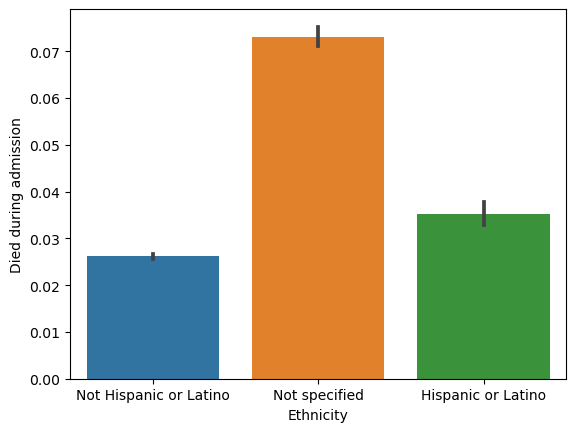

In [34]:
sns.barplot(x = 'Ethnicity', y = target,data=data)

<Axes: xlabel='Races', ylabel='Died during admission'>

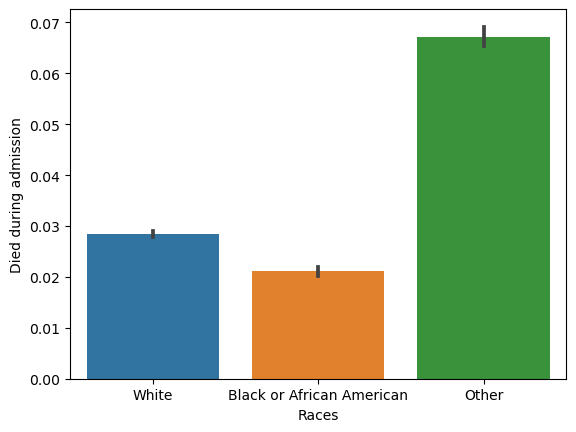

In [30]:
sns.barplot(x = 'Races', y = target,data=data)

<Axes: xlabel='Gender', ylabel='Died during admission'>

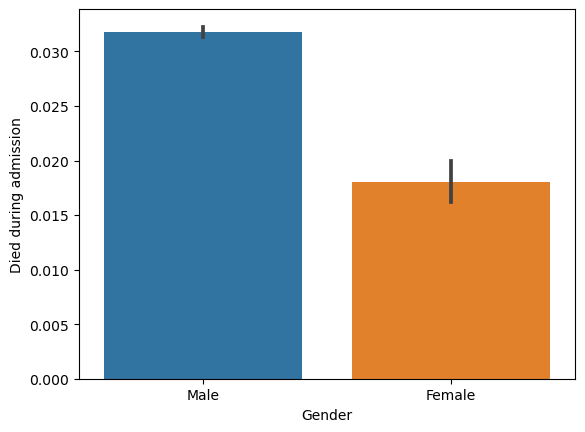

In [32]:
sns.barplot(x = 'Gender', y = target,data=data)

<Axes: xlabel='Veteran flag', ylabel='Died during admission'>

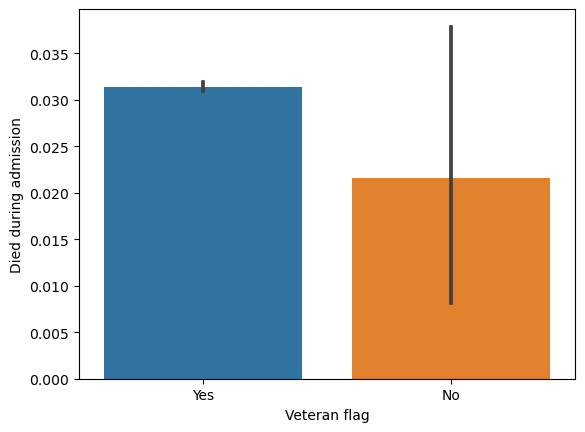

In [42]:
sns.barplot(x = 'Veteran flag', y = target,  data=data)

<Axes: xlabel='AgeBin', ylabel='Died during admission'>

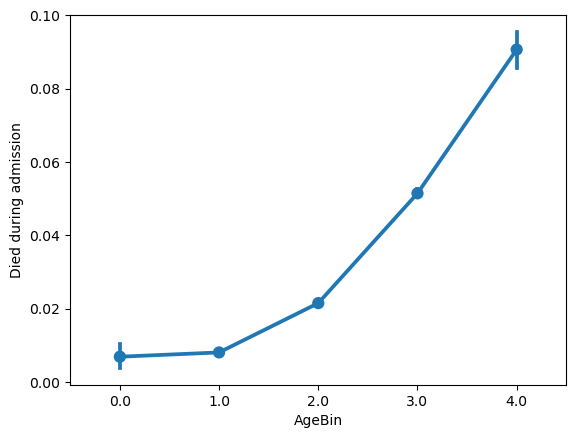

In [43]:
sns.pointplot(x = 'AgeBin', y = target,  data=data)

Text(0.5, 1.0, 'Age vs Races Readmission Comparison')

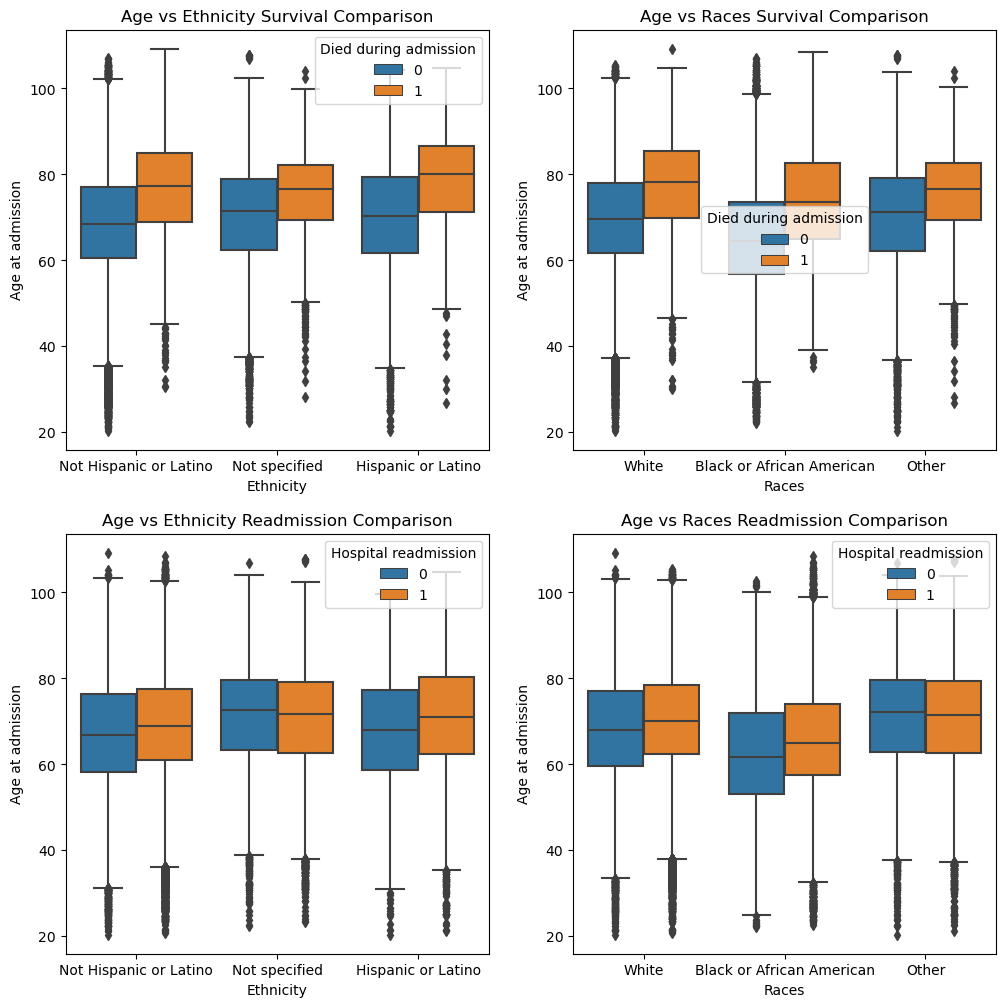

In [37]:
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2,figsize=(12,12))

sns.boxplot(x = 'Ethnicity', y = 'Age at admission', hue = target, data = data, ax = axis1)
axis1.set_title('Age vs Ethnicity Survival Comparison')

sns.boxplot(x = 'Races', y='Age at admission', hue = target, data = data, ax = axis2)
axis2.set_title('Age vs Races Survival Comparison')


sns.boxplot(x = 'Ethnicity', y = 'Age at admission', hue = target2, data = data, ax = axis3)
axis3.set_title('Age vs Ethnicity Readmission Comparison')

sns.boxplot(x = 'Races', y='Age at admission', hue = target2, data = data, ax = axis4)
axis4.set_title('Age vs Races Readmission Comparison')


Text(0.5, 1.0, 'Age vs Gender Readmission Comparison')

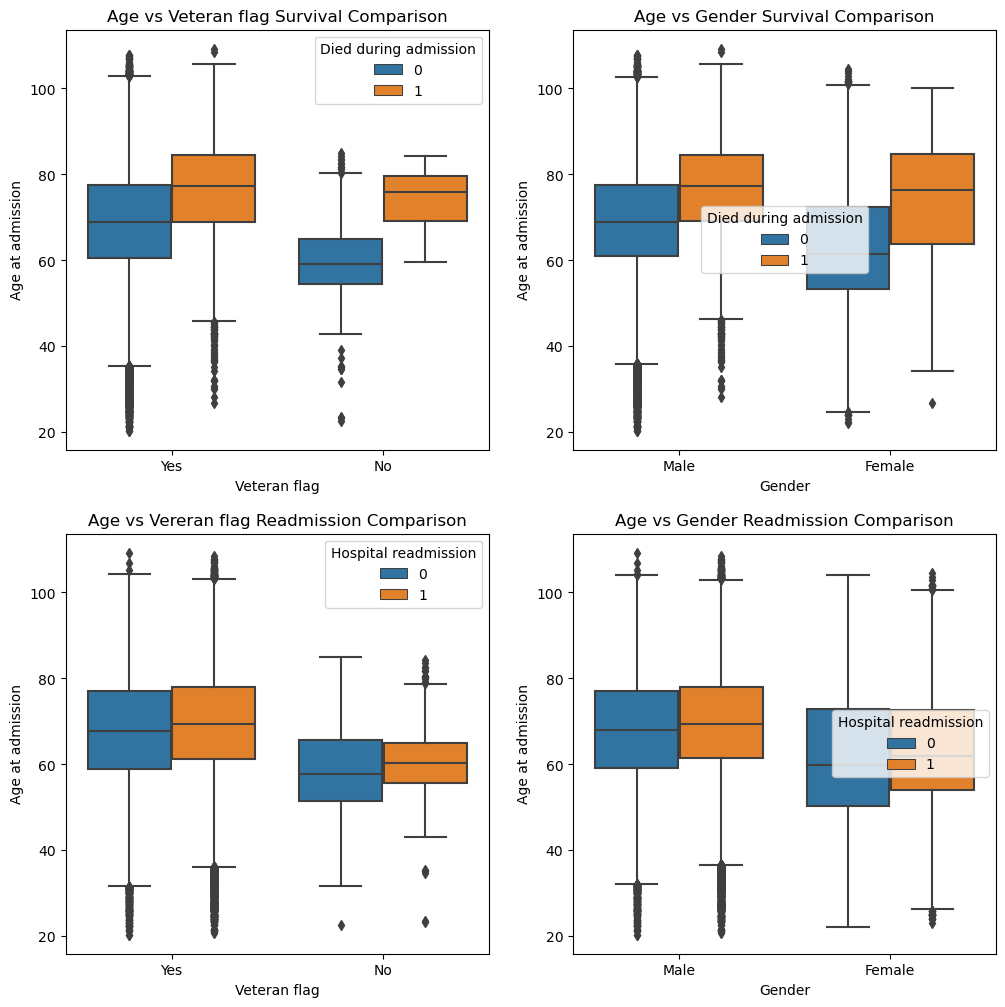

In [38]:
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2,figsize=(12,12))

sns.boxplot(x = 'Veteran flag', y = 'Age at admission', hue = target, data = data, ax = axis1)
axis1.set_title('Age vs Veteran flag Survival Comparison')

sns.boxplot(x = 'Gender', y='Age at admission', hue = target, data = data, ax = axis2)
axis2.set_title('Age vs Gender Survival Comparison')

sns.boxplot(x = 'Veteran flag', y = 'Age at admission', hue = target2, data = data, ax = axis3)
axis3.set_title('Age vs Vereran flag Readmission Comparison')

sns.boxplot(x = 'Gender', y ='Age at admission', hue = target2, data = data, ax = axis4)
axis4.set_title('Age vs Gender Readmission Comparison')

Text(0.5, 1.0, 'Gender vs Veteran flag Survival Comparison')

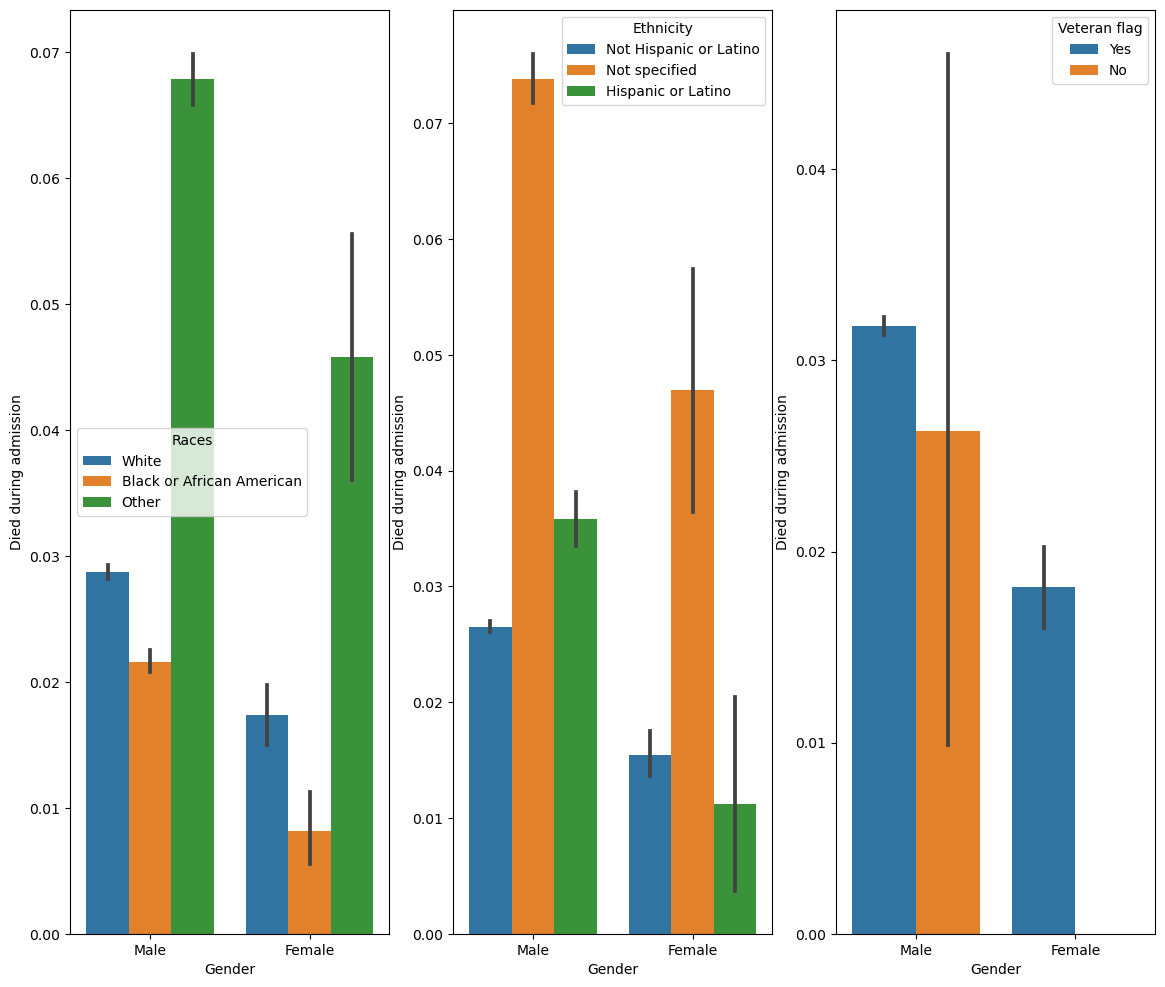

In [40]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Gender', y = target, hue = 'Races', data=data, ax = qaxis[0])
axis1.set_title('Gender vs Races Survival Comparison')

sns.barplot(x = 'Gender', y = target, hue = 'Ethnicity', data=data, ax  = qaxis[1])
axis1.set_title('Gender vs Ethnicity Survival Comparison')

sns.barplot(x = 'Gender', y = target, hue = 'Veteran flag', data=data, ax  = qaxis[2])
axis1.set_title('Gender vs Veteran flag Survival Comparison')

Text(0.5, 1.0, 'AgeBin vs Veteran flag Survival Comparison')

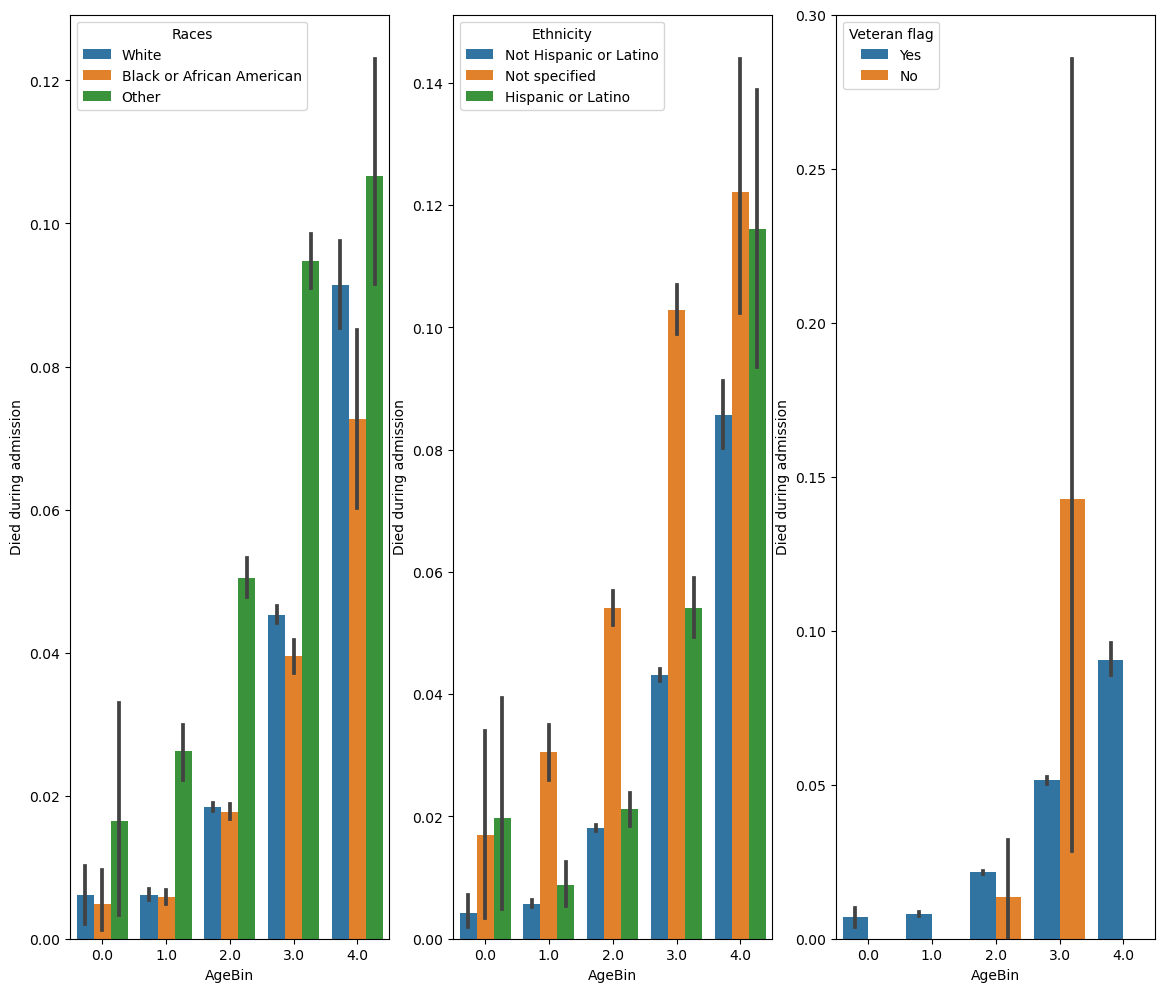

In [41]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'AgeBin', y = target, hue = 'Races', data=data, ax = qaxis[0])
axis1.set_title('AgeBin vs Races Survival Comparison')

sns.barplot(x = 'AgeBin', y = target, hue = 'Ethnicity', data=data, ax  = qaxis[1])
axis1.set_title('AgeBin vs Ethnicity Survival Comparison')

sns.barplot(x = 'AgeBin', y = target, hue = 'Veteran flag', data=data, ax  = qaxis[2])
axis1.set_title('AgeBin vs Veteran flag Survival Comparison')

<Axes: xlabel='AgeBin', ylabel='Hospital readmission'>

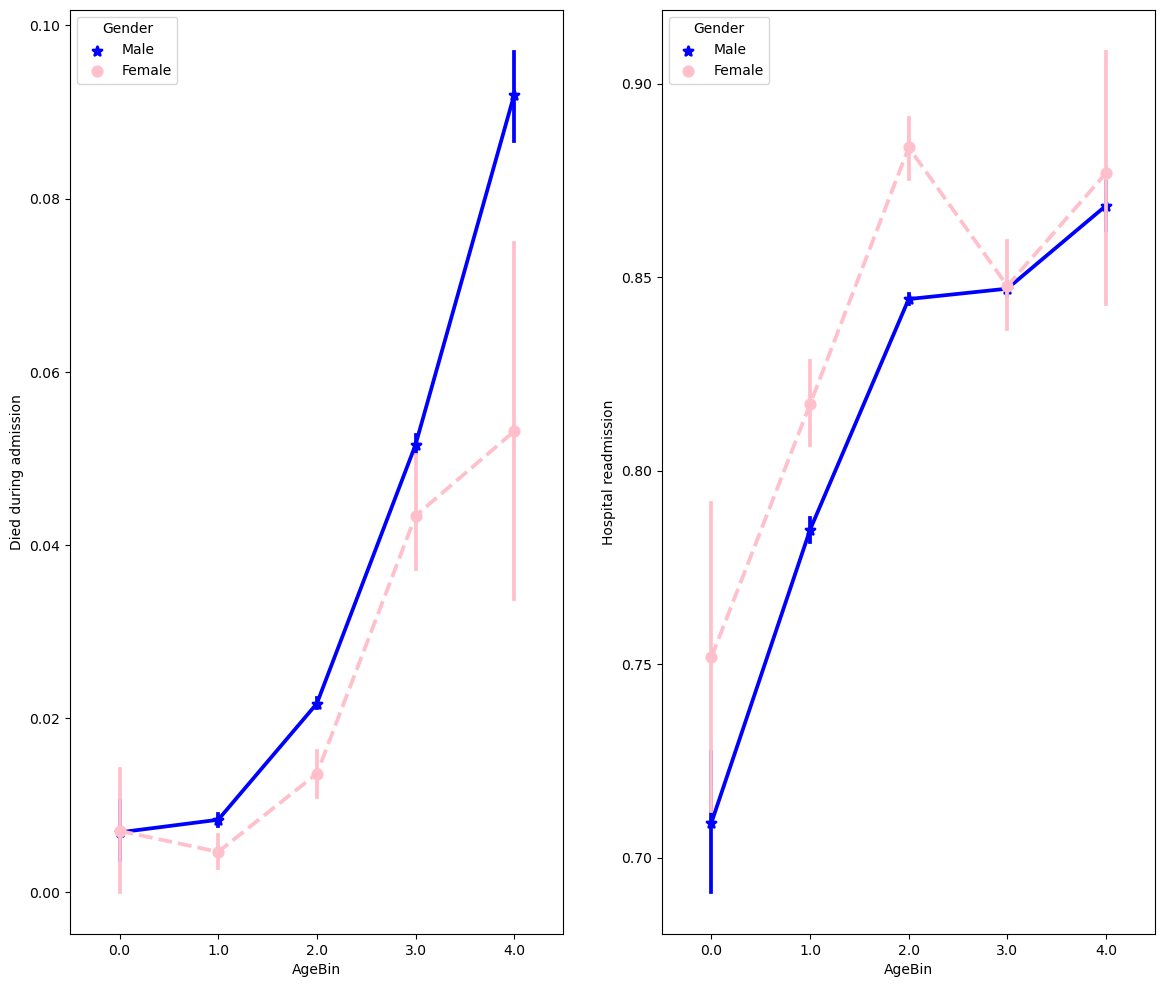

In [49]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="AgeBin", y=target, hue="Gender", data=data,
              palette={"Male": "blue", "Female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="AgeBin", y=target2, hue="Gender", data=data,
              palette={"Male": "blue", "Female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

<Axes: xlabel='AgeBin', ylabel='Hospital readmission'>

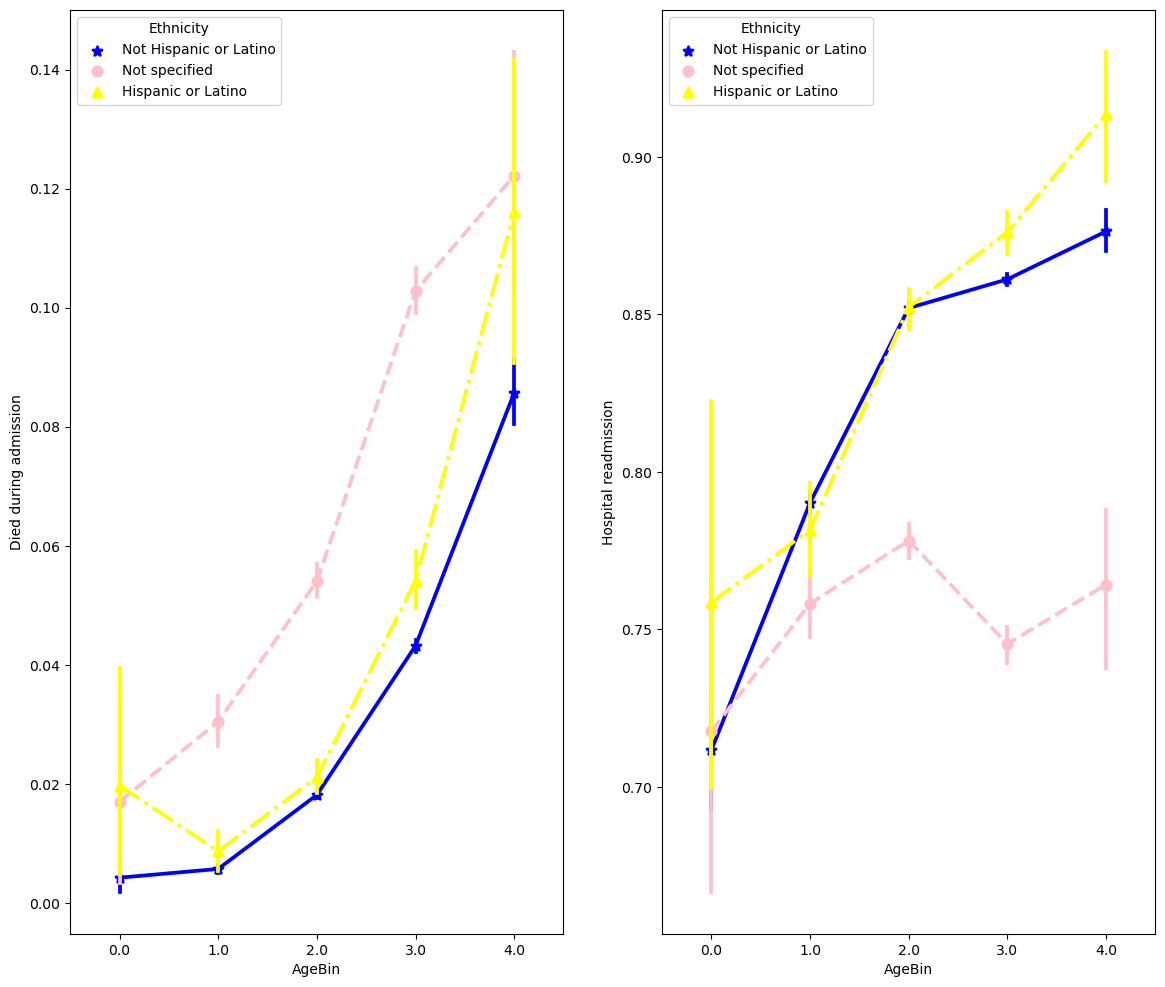

In [55]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="AgeBin", y=target, hue="Ethnicity", data=data,
              palette={"Not Hispanic or Latino": "blue", 'Not specified': "pink",'Hispanic or Latino':'yellow'},
              markers=["*", "o","^"], linestyles=["-", "--", "-."], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="AgeBin", y=target2, hue="Ethnicity", data=data,
              palette={"Not Hispanic or Latino": "blue", 'Not specified': "pink",'Hispanic or Latino':'yellow'},
              markers=["*", "o","^"], linestyles=["-", "--", "-."], ax = maxis2)

<Axes: xlabel='AgeBin', ylabel='Hospital readmission'>

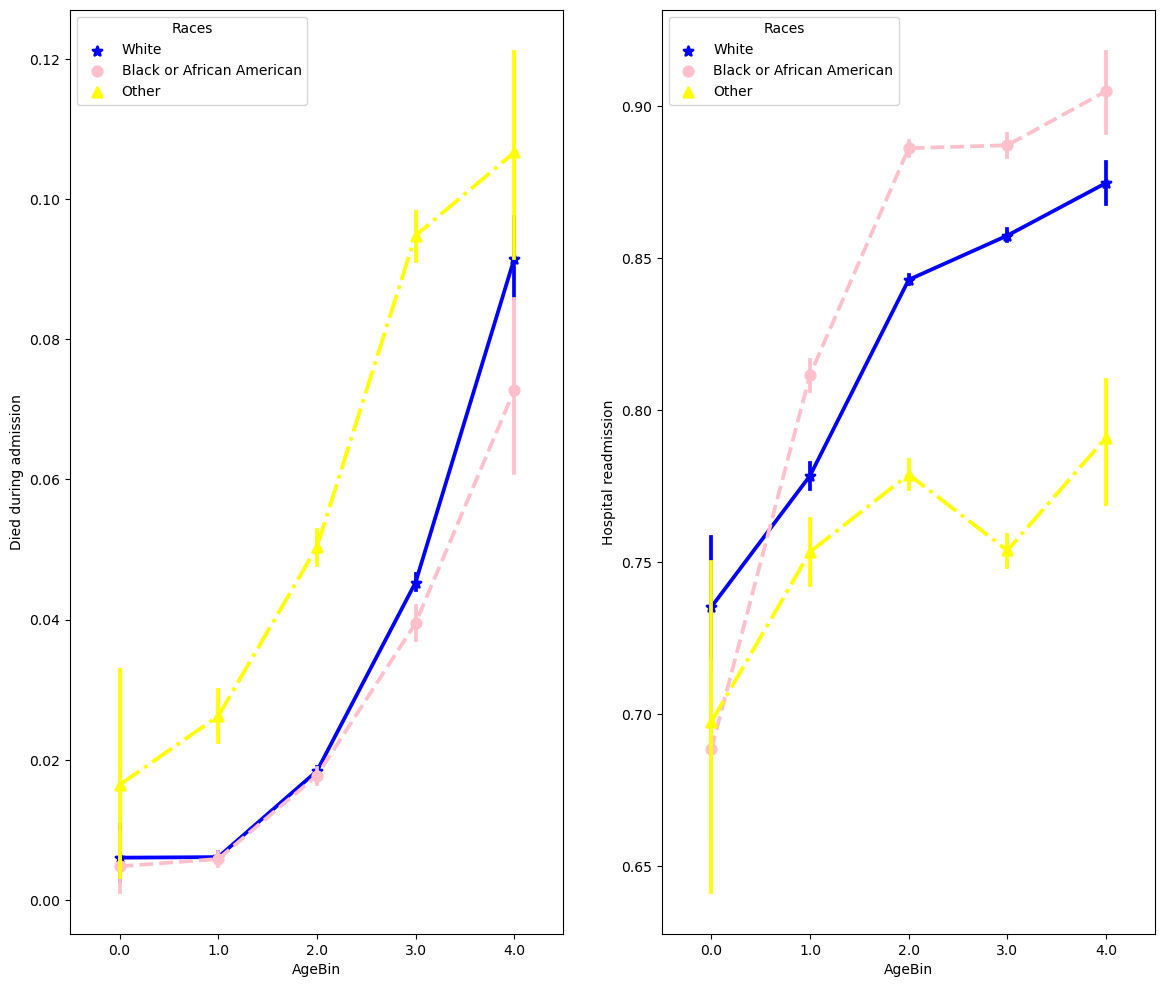

In [60]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does agebin factor with races & survival compare
sns.pointplot(x="AgeBin", y=target, hue="Races", data=data,
              palette={'White': "blue", 'Black or African American': "pink",'Other':'yellow'},
              markers=["*", "o","^"], linestyles=["-", "--", "-."], ax = maxis1)

#how does class factor with races & readmission compare
sns.pointplot(x="AgeBin", y=target2, hue="Races", data=data,
              palette={'White': "blue", 'Black or African American': "pink",'Other':'yellow'},
              markers=["*", "o","^"], linestyles=["-", "--", "-."], ax = maxis2)

/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


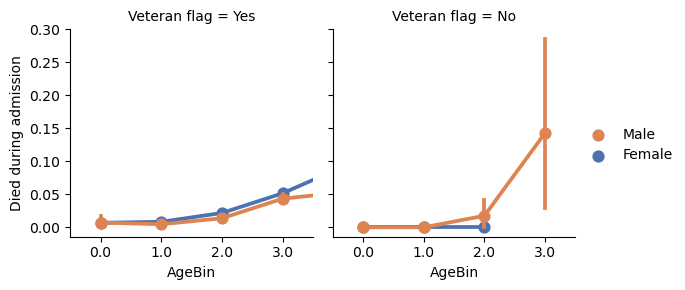

In [63]:
e = sns.FacetGrid(data, col = 'Veteran flag')
e.map(sns.pointplot, 'AgeBin', 'Died during admission', 'Gender', errorbar=('ci', 95.0), palette = 'deep')
e.add_legend()

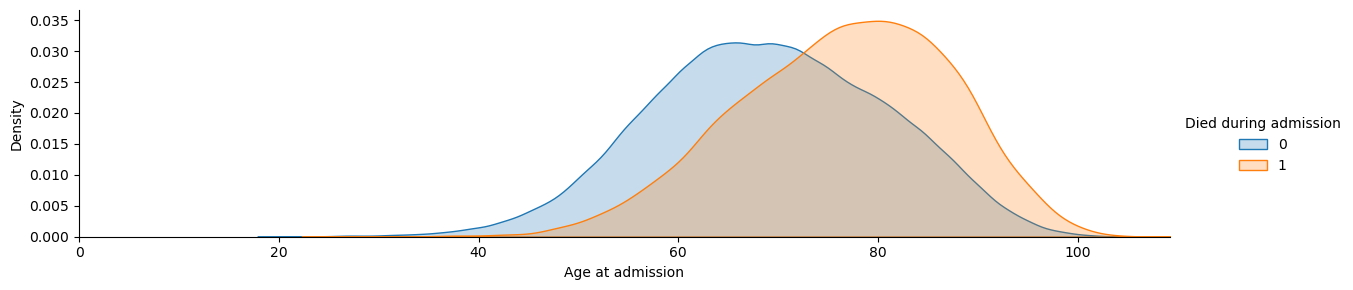

In [66]:
#plot distributions of age of patients who survived or did not survive
a = sns.FacetGrid( data, hue = target, aspect=4)
a.map(sns.kdeplot, 'Age at admission', fill= True )
a.set(xlim=(0 , data['Age at admission'].max()))
a.add_legend()

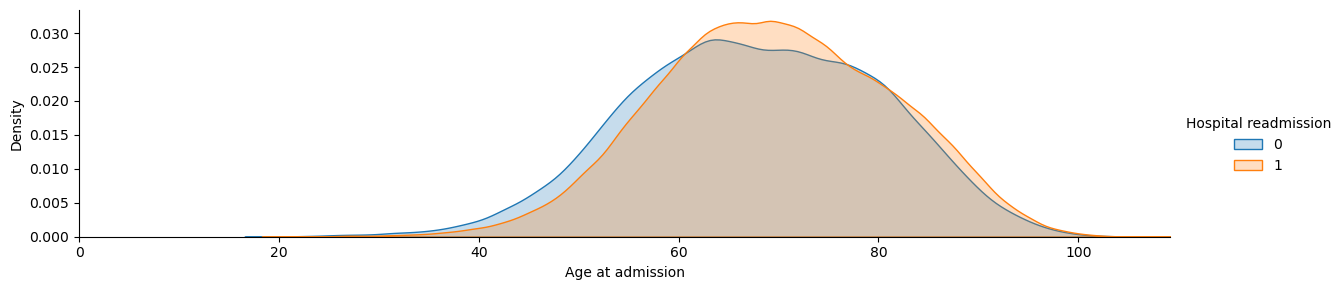

In [67]:
#plot distributions of age of patients who survived or did not survive
a = sns.FacetGrid( data, hue = target2, aspect=4)
a.map(sns.kdeplot, 'Age at admission', fill= True)
a.set(xlim=(0 , data['Age at admission'].max()))
a.add_legend()

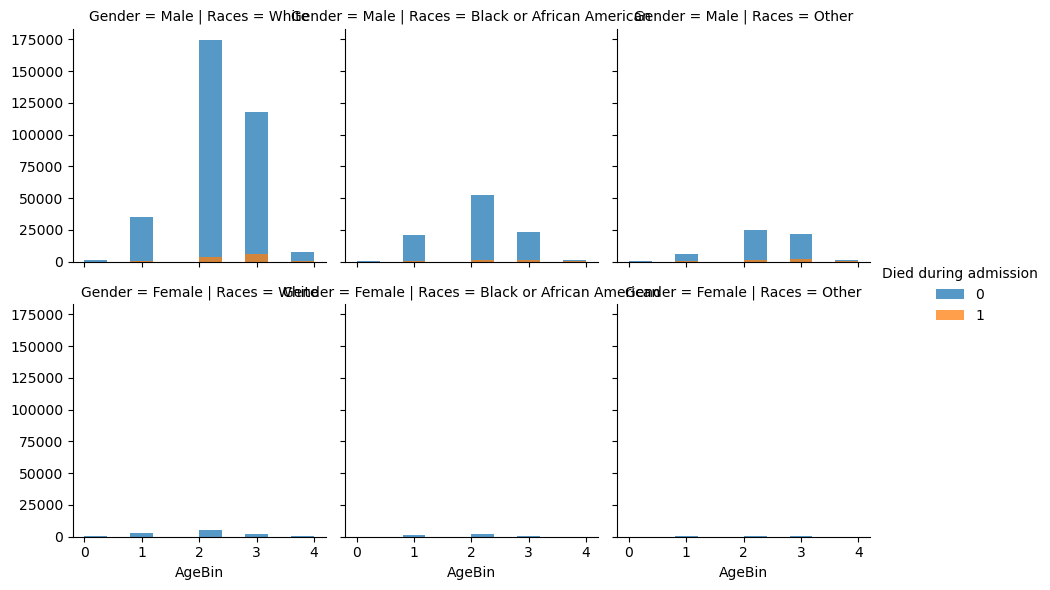

In [68]:
#histogram comparison of gender,races, and age by survival
h = sns.FacetGrid(data, row = 'Gender', col = 'Races', hue = target)
h.map(plt.hist, 'AgeBin', alpha = .75)
h.add_legend()

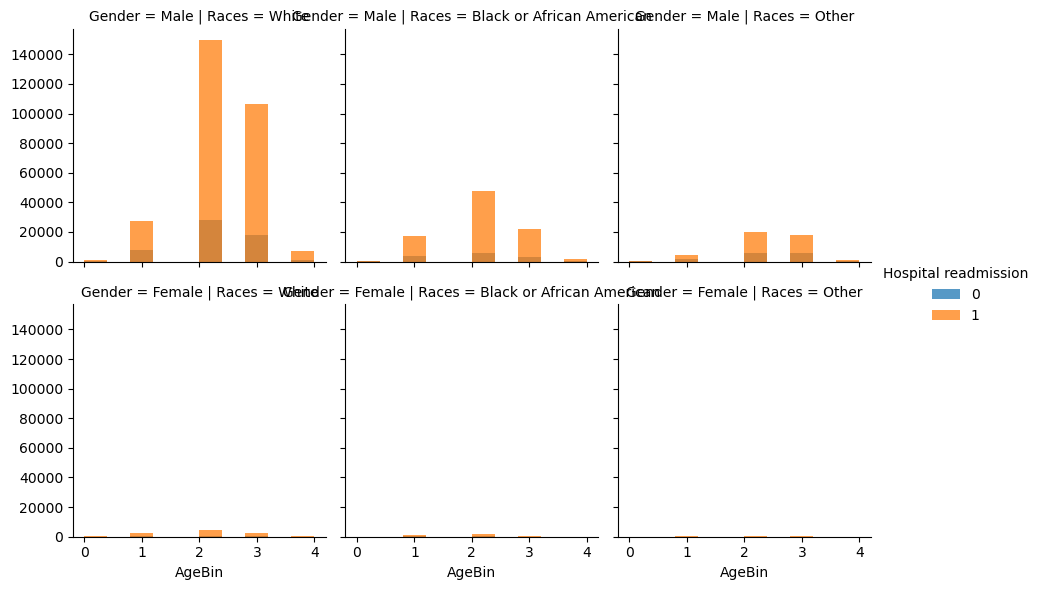

In [70]:
#histogram comparison of gender,races, and age by readmisison
h = sns.FacetGrid(data, row = 'Gender', col = 'Races', hue = target2)
h.map(plt.hist, 'AgeBin', alpha = .75)
h.add_legend()

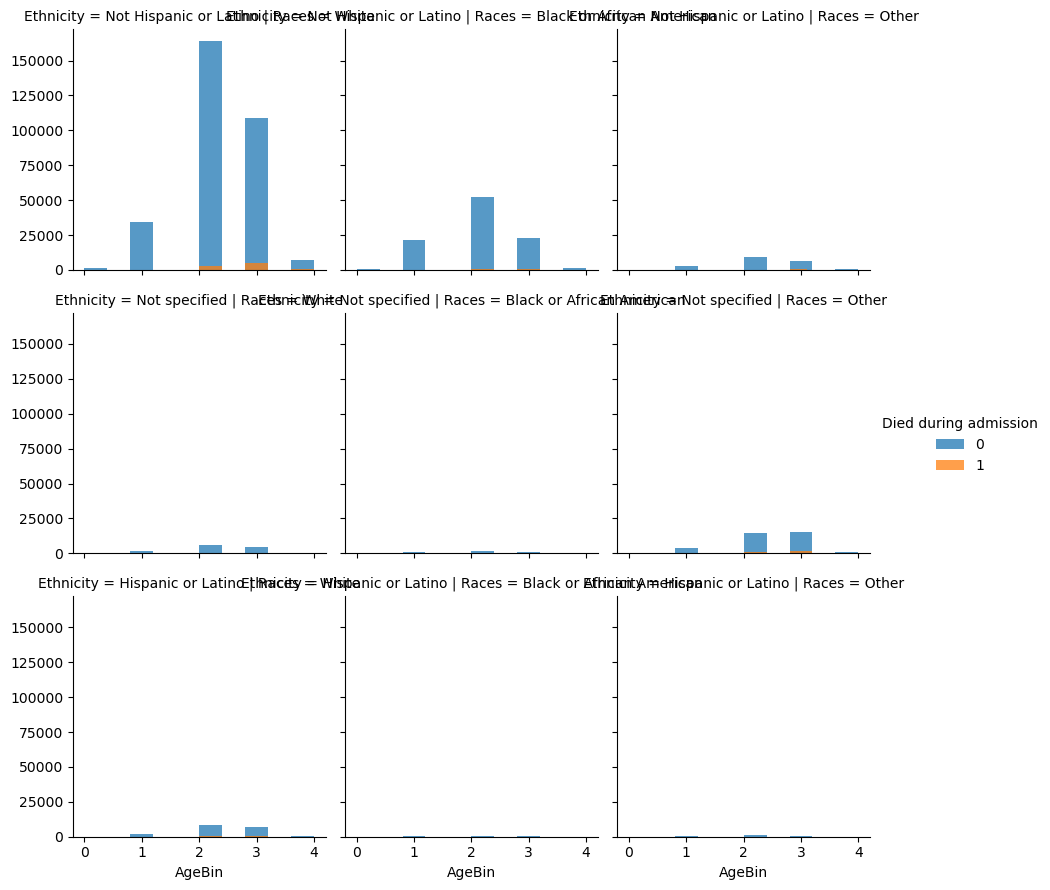

In [69]:
#histogram comparison of ethinicity,races, and age by survival
h = sns.FacetGrid(data, row = 'Ethnicity', col = 'Races', hue = target)
h.map(plt.hist, 'AgeBin', alpha = .75)
h.add_legend()

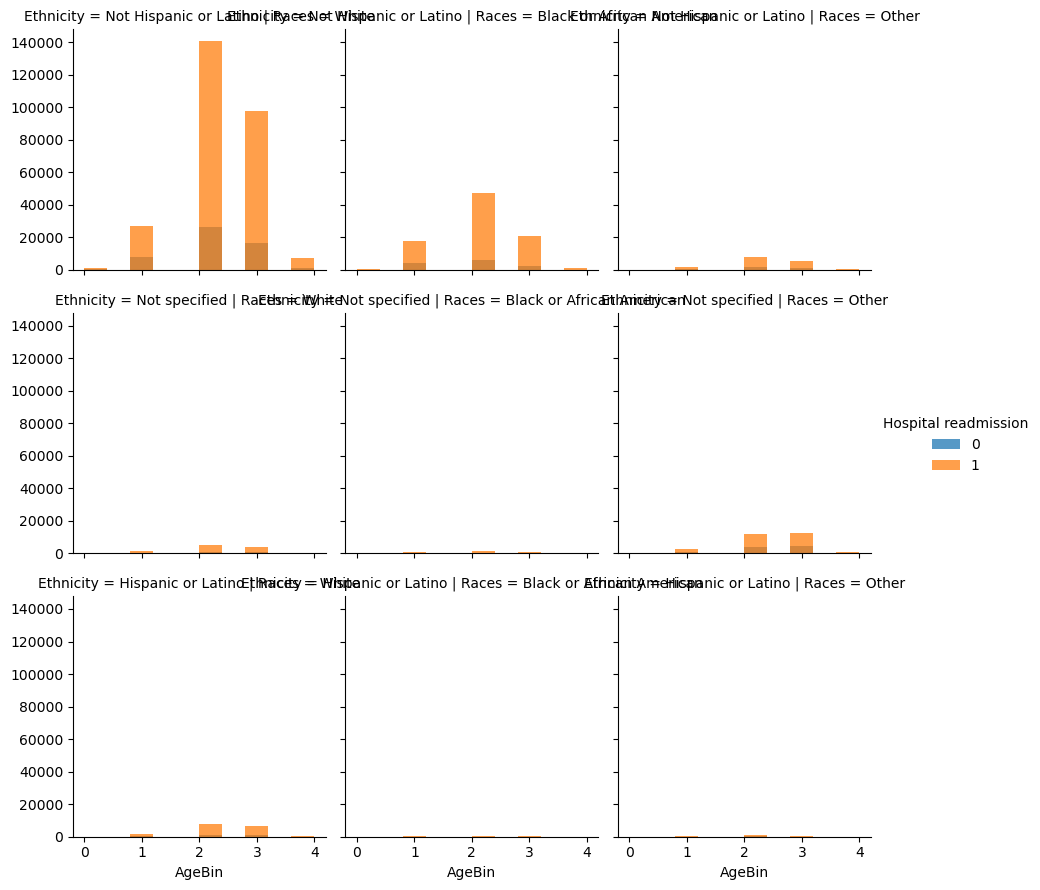

In [71]:
#histogram comparison of ethinicity,races, and age by readmission
h = sns.FacetGrid(data, row = 'Ethnicity', col = 'Races', hue = target2)
h.map(plt.hist, 'AgeBin', alpha = .75)
h.add_legend()

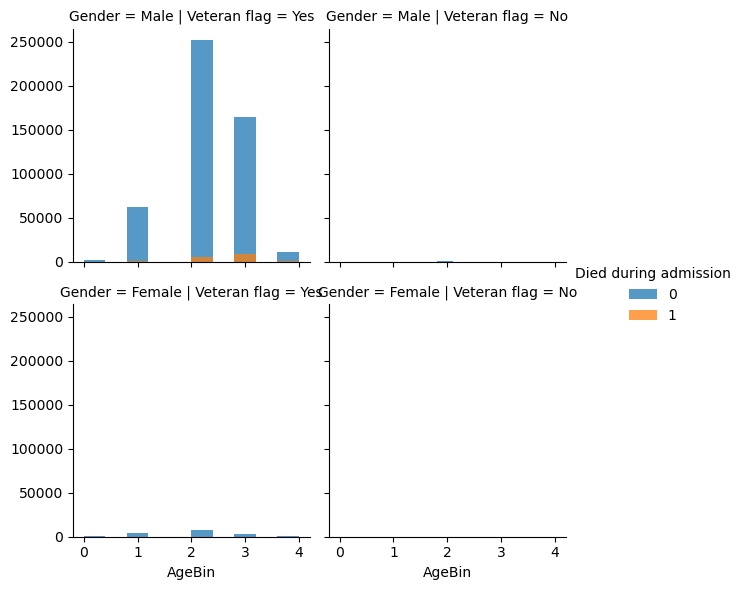

In [72]:
#histogram comparison of gender, veteran flag, and age by survival
h = sns.FacetGrid(data, row = 'Gender', col = 'Veteran flag', hue = target)
h.map(plt.hist, 'AgeBin', alpha = .75)
h.add_legend()

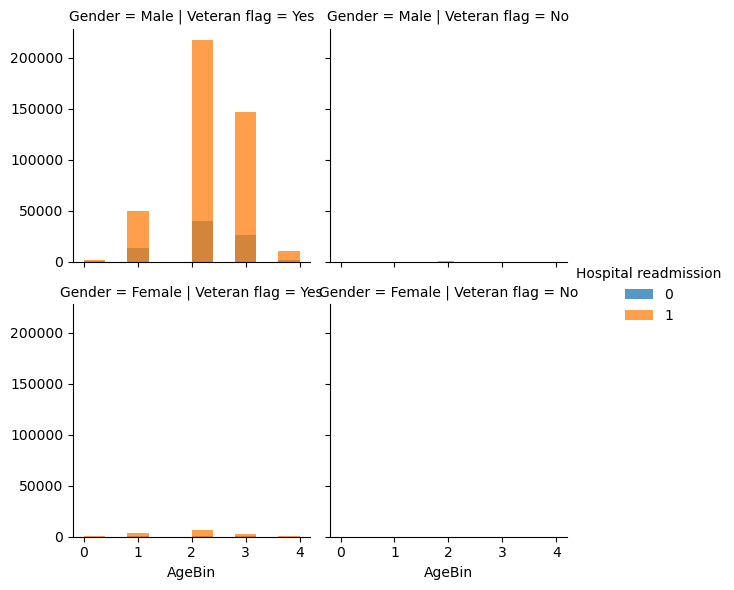

In [73]:
#histogram comparison of gender, veteran flag, and age by readmission
h = sns.FacetGrid(data, row = 'Gender', col = 'Veteran flag', hue = target2)
h.map(plt.hist, 'AgeBin', alpha = .75)
h.add_legend()

/tmp/ipykernel_192603/3295368943.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


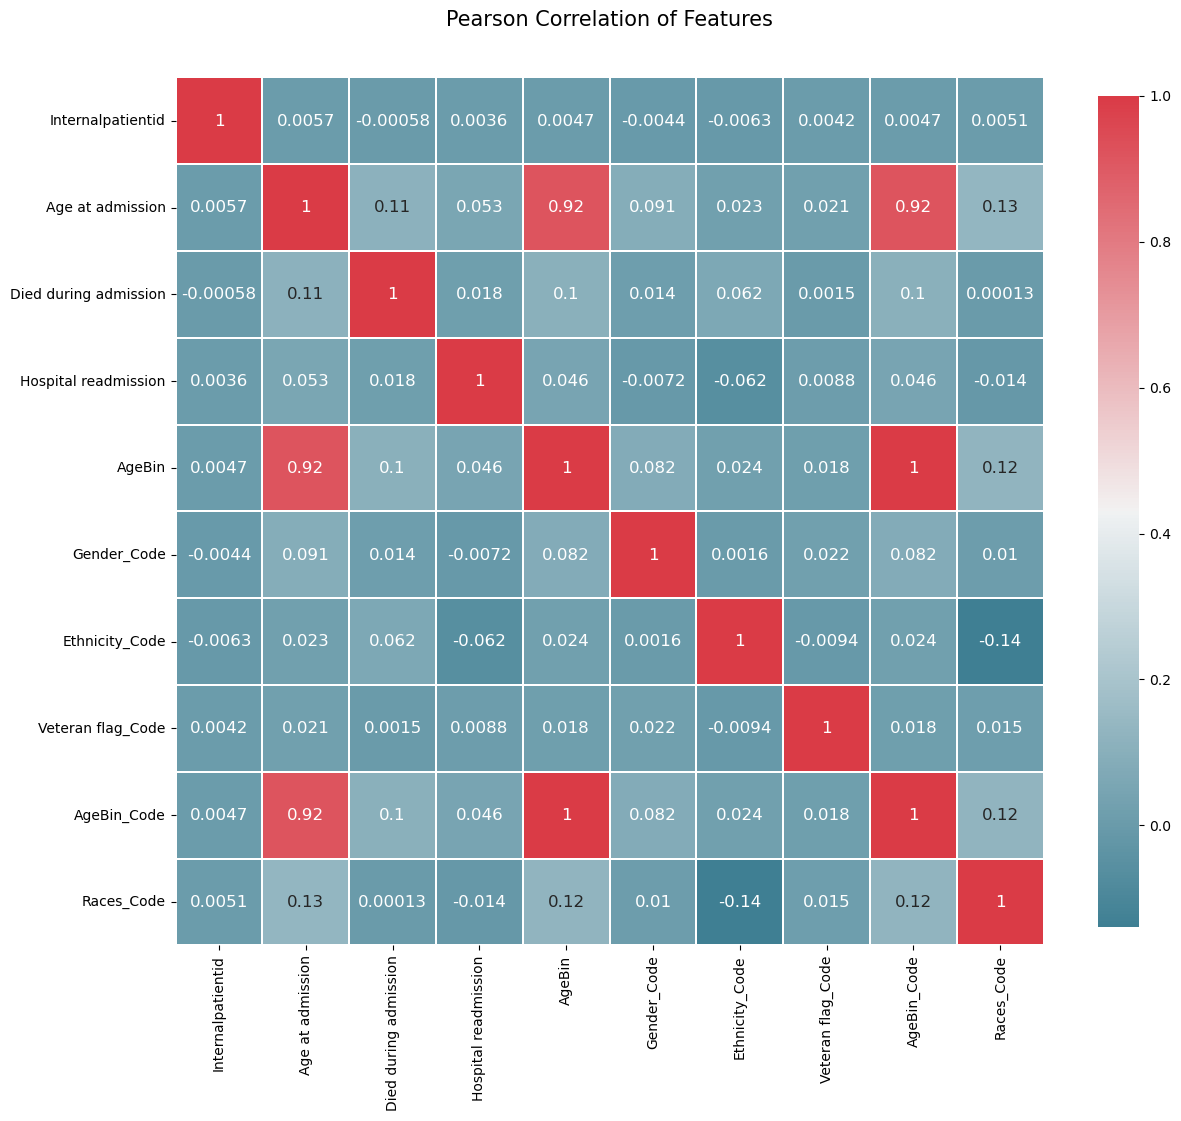

In [16]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

#correlation_heatmap(data[orig_cols+[target, target2]])
correlation_heatmap(inpatient_enth2)